In [5]:
import pandas as pd
        
import plotly.graph_objects as go
import datetime as dt




In [7]:
pair = "EUR_USD"
granularity = "H4"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")

In [10]:
df.tail()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
3995,2024-08-19 21:00:00+00:00,7081,1.10827,1.10875,1.10800,1.10820,1.10813,1.10867,1.10792,1.10812,1.10841,1.10883,1.10808,1.10827
3996,2024-08-20 01:00:00+00:00,11593,1.10820,1.10872,1.10749,1.10770,1.10813,1.10865,1.10741,1.10763,1.10827,1.10880,1.10757,1.10778
3997,2024-08-20 05:00:00+00:00,17356,1.10768,1.10889,1.10718,1.10797,1.10761,1.10882,1.10711,1.10789,1.10776,1.10897,1.10726,1.10805
3998,2024-08-20 09:00:00+00:00,16884,1.10798,1.10987,1.10750,1.10983,1.10790,1.10979,1.10743,1.10975,1.10807,1.10995,1.10758,1.10991
3999,2024-08-20 13:00:00+00:00,26483,1.10984,1.11192,1.10926,1.11149,1.10976,1.11184,1.10918,1.11141,1.10991,1.11200,1.10933,1.11157


In [77]:
df['sTime'] = [dt.datetime.strftime(x, 's%y-%m-%d %H:%M') for x in df.time] #s%y-%m-%d %H:%M

In [69]:
df_plot = df.iloc[:100]
df_plot

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,sTime
0,2022-01-26 02:00:00+00:00,3318,1.13056,1.13108,1.13007,1.13045,1.13049,1.13101,1.13000,1.13037,1.13064,1.13116,1.13014,1.13053,s22-01-26 02:00
1,2022-01-26 06:00:00+00:00,10557,1.13046,1.13053,1.12833,1.12869,1.13039,1.13047,1.12826,1.12862,1.13054,1.13060,1.12840,1.12876,s22-01-26 06:00
2,2022-01-26 10:00:00+00:00,12757,1.12868,1.12882,1.12716,1.12824,1.12860,1.12875,1.12710,1.12817,1.12875,1.12889,1.12723,1.12830,s22-01-26 10:00
3,2022-01-26 14:00:00+00:00,17643,1.12826,1.12965,1.12740,1.12880,1.12819,1.12958,1.12733,1.12873,1.12832,1.12972,1.12746,1.12887,s22-01-26 14:00
4,2022-01-26 18:00:00+00:00,31279,1.12881,1.13015,1.12353,1.12410,1.12874,1.12999,1.12345,1.12401,1.12888,1.13031,1.12360,1.12420,s22-01-26 18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-02-16 22:00:00+00:00,9365,1.13736,1.13850,1.13673,1.13818,1.13714,1.13841,1.13664,1.13810,1.13759,1.13859,1.13681,1.13825,s22-02-16 22:00
96,2022-02-17 02:00:00+00:00,35305,1.13818,1.13850,1.13232,1.13564,1.13810,1.13843,1.13224,1.13557,1.13826,1.13858,1.13239,1.13572,s22-02-17 02:00
97,2022-02-17 06:00:00+00:00,48292,1.13566,1.13863,1.13428,1.13614,1.13557,1.13856,1.13420,1.13606,1.13574,1.13871,1.13436,1.13622,s22-02-17 06:00
98,2022-02-17 10:00:00+00:00,33519,1.13614,1.13795,1.13517,1.13595,1.13607,1.13788,1.13510,1.13586,1.13621,1.13802,1.13523,1.13604,s22-02-17 10:00


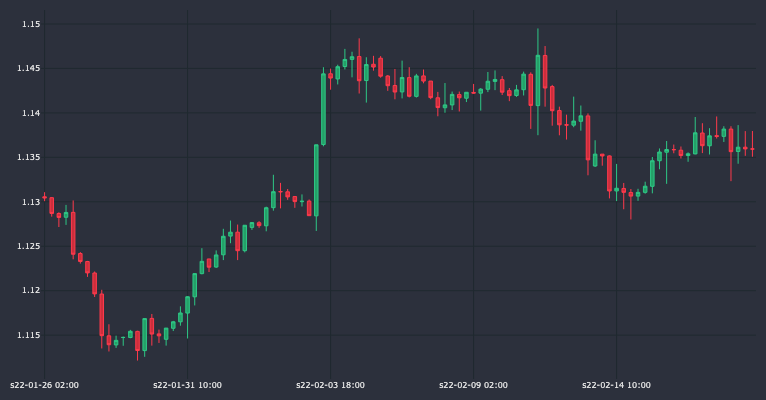

In [86]:
fig = go.Figure()
fig.add_trace(go.Candlestick(
    x = df_plot.sTime,
    open = df_plot.mid_o,
    high = df_plot.mid_h,
    low = df_plot.mid_l,
    close = df_plot.mid_c,
    line = dict(width = 1), opacity = 1,
    increasing_fillcolor = '#24A068',
    decreasing_fillcolor = '#CC2E3C',
    increasing_line_color = '#2EC886',
    decreasing_line_color = '#FF3A4C'
))

fig.update_yaxes(
    gridcolor = "#1f292f"
)

fig.update_xaxes(
    gridcolor = "#1f292f",
    rangeslider = dict(visible = False), #turns off the range slider
    # rangebreaks = [
    #     dict(bounds = ['sat', 'mon'])
    # ],
    nticks = 5,
    #type = "date"
)

fig.update_layout(
    width = 900,
    height = 400,
    margin = dict(l=10, r=10, b=10, t=10),
    paper_bgcolor="#2c303c",
    plot_bgcolor = "#2c303c",
    font_color = "#e1e1e1",
    font_size = 8
)